In [2]:
 from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sklearn
import seaborn as sns
import time
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import datetime
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV 
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder, StandardScaler #transforms categorical into numbers
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, make_scorer, f1_score, confusion_matrix
import xgboost
from sklearn.cluster import KMeans


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [4]:
MNIST_train = pd.read_csv('train.csv')
MNIST_test = pd.read_csv('test.csv')

In [5]:
MNIST_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
print(MNIST_train.shape)
print(MNIST_test.shape)

(60000, 785)
(5000, 785)


In [7]:
MNIST_test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
MNIST_train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

All labels have equal value

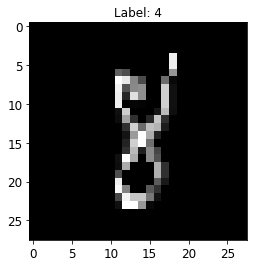

In [9]:
num = 4
plot_num = MNIST_train.iloc[num, 1:]
plot_num = np.array(plot_num).reshape(28, -1)
plt.imshow(plot_num, cmap='gray')
plt.title(f'Label: {MNIST_train.iloc[num, 0]}')
plt.show()

In [10]:
X_train, y_train = MNIST_train.drop('label', axis=1), MNIST_train['label']

#RANDOM FOREST STEP 1

In [11]:
rf= RandomForestClassifier(max_features= 'sqrt', bootstrap= True)
%time rf.fit(X_train, y_train)

CPU times: user 37.6 s, sys: 32.7 ms, total: 37.7 s
Wall time: 37.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
X_test=MNIST_test.drop('id', axis=1)

y_pred= rf.predict(X_test)

In [13]:
y_pred

array([3, 0, 2, ..., 1, 6, 3])

In [14]:
y_pred

array([3, 0, 2, ..., 1, 6, 3])

In [15]:
rf_f1Score = f1_score(y_train[:5000], y_pred, average='weighted')

display('F1 Score: {:.4f}'.format(rf_f1Score))

'F1 Score: 0.0988'

In [16]:
Identification = MNIST_test['id'].copy()
RF1 = pd.DataFrame(y_pred)
RF1.columns= ['label']
RandForest= pd.concat([Identification, RF1], axis= 1)
RandForest

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


#PCA ANALYSIS

In [17]:
X = np.concatenate((X_train, X_test), axis=0)

In [18]:
X.shape

(65000, 784)

In [19]:
pca= PCA()
%time pca.fit(X)

CPU times: user 21.1 s, sys: 1.27 s, total: 22.4 s
Wall time: 11.8 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
total_var= np.cumsum(pca.explained_variance_ratio_)
total_var

array([0.07820924, 0.13331981, 0.17770713, 0.21391757, 0.24776457,
       0.27515448, 0.29940492, 0.32028872, 0.34062704, 0.35777753,
       0.37394162, 0.38825205, 0.40196327, 0.41402159, 0.42574092,
       0.43696352, 0.4477659 , 0.45830255, 0.46852408, 0.47861495,
       0.4880674 , 0.49728343, 0.5059142 , 0.51430402, 0.52250989,
       0.53047557, 0.5382526 , 0.54567668, 0.55291105, 0.5599284 ,
       0.56663178, 0.57328639, 0.57987629, 0.58624445, 0.59242203,
       0.59844496, 0.60419512, 0.60986965, 0.61533349, 0.62065836,
       0.62584974, 0.6309346 , 0.63586597, 0.64076904, 0.64558113,
       0.65025374, 0.65483131, 0.65937312, 0.66382974, 0.66815951,
       0.67242269, 0.67663126, 0.68079758, 0.684922  , 0.68900075,
       0.69290995, 0.69673057, 0.70044184, 0.70409617, 0.70772377,
       0.71126841, 0.71474022, 0.71818322, 0.72155399, 0.72487709,
       0.72813628, 0.73136419, 0.73450819, 0.73758727, 0.74061206,
       0.74360821, 0.74652834, 0.74940355, 0.75222785, 0.75504

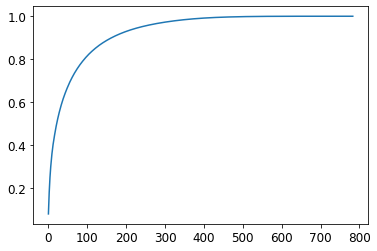

In [21]:
plt.plot(total_var)
plt.show()

In [22]:
idx_95 = np.where(total_var >= 0.95)[0][0]
print(idx_95)
print(total_var[idx_95])

238
0.9501355396380707


Exactly 239 dimensions are enough to contain 95% of the variance (Python starts indexing at 0, so it would be 239)

In [23]:
X_pca = pca.transform(X_train)

In [24]:
X_pca[:,:idx_95+1].shape

(60000, 239)

In [25]:
rf_pca= RandomForestClassifier(max_features= 'sqrt', bootstrap= True)
%time rf_pca.fit(X_pca[:,:idx_95+1], y_train)

CPU times: user 2min 14s, sys: 156 ms, total: 2min 15s
Wall time: 2min 14s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
X_test_pca = pca.transform(X_test)[:,:idx_95+1]

In [27]:
y_pred_pca = rf_pca.predict(X_test_pca)

In [28]:
y_pred_pca

array([3, 0, 2, ..., 1, 6, 3])

In [29]:
rf_f1Score = f1_score(y_test, y_pred_pca, average='weighted')

display('F1 Score: {:.4f}'.format(rf_f1Score))

NameError: ignored

In [ ]:
RF_PCA = pd.DataFrame(y_pred_pca)
RF_PCA.columns= ['label']
RandForest_PCA= pd.concat([Identification, RF_PCA], axis= 1)
RandForest_PCA

#**Observing Experiment Error**

---
#Flaw is that we were fitting pca to our test data 


In [ ]:
MNIST_train.describe()

In [ ]:
sns.countplot(y_train, color = sns.color_palette()[0])

In [ ]:
pca_2 = PCA().fit(X_train)

In [ ]:
total_var2= np.cumsum(pca_2.explained_variance_ratio_)
idx_95_2 = np.where(total_var2 >= 0.95)[0][0]
idx_95_2

Exactly 237 dimensions are enough to contain 95% of the variance (Pythong starts indexing at 0, so it would be 237)

In [ ]:
X_pca = pca_2.transform(X_train)

In [ ]:
rf_pca_2= RandomForestClassifier(max_features= 'sqrt', bootstrap= True)
%time rf_pca_2.fit(X_pca[:,:idx_95_2+1], y_train)

In [ ]:
X_test_pca_2= pca_2.transform(X_test)[:,:idx_95_2+1]

In [ ]:
y_pred_pca_2 = rf_pca_2.predict(X_test_pca_2)

In [ ]:
rf_f1Score = f1_score(y_train[:5000], y_pred_pca_2, average='weighted')

display('F1 Score: {:.4f}'.format(rf_f1Score))

In [ ]:
RF_PCA_2 = pd.DataFrame(y_pred_pca_2)
RF_PCA_2.columns= ['label']
RandForest_PCA_2= pd.concat([Identification, RF_PCA_2], axis= 1)
RandForest_PCA_2

In [ ]:
pd.DataFrame(RandForest).to_csv('Flawed RandomForest.csv')
pd.DataFrame(RandForest_PCA).to_csv('Flawed RandomForest with PCA.csv')
pd.DataFrame(RandForest_PCA_2).to_csv('RandomForest Correct.csv')

#K-MEANS

In [ ]:
kmeans = KMeans(n_clusters=10).fit(X_pca[:,:idx_95_2+1])
kmeans.labels_
kmeans.predict(X_test_pca_2)
kmeans.cluster_centers_

In [ ]:
y_kmeans_predict = kmeans.predict(X_test_pca_2)
print(y_kmeans_predict)

In [ ]:
y_kmeans_match = kmeans.predict(X_pca[:,:idx_95_2+1])
match= []
for i in range(10):
  match.append(np.round(np.mean(y_kmeans_match[np.where(y_train==i)[0]])))

match

In [ ]:
for i in range(len(y_kmeans_predict)):
    y_kmeans_predict[i] =int(match[y_kmeans_predict[i]])

y_kmeans_predict

In [ ]:
X_test_pca_2.shape

In [ ]:
plt.scatter(X_test_pca_2[:,0], X_test_pca_2[:,1], c=y_kmeans_predict) 
plt.show()

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
kmeans_2= KMeans(n_clusters=10).fit(X_pca[:,:2])
plot_decision_boundaries(kmeans_2, X_test_pca_2[:,:2])

#Neural Network

In [ ]:
X_train, y_train = MNIST_train.drop('label', axis=1), MNIST_train['label']